# Project - Netflix Data: Cleaning, Analysis and Visualization

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter

In [33]:
df = pd.read_csv("netflix1.csv")

In [34]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [51]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [36]:
df.shape

(8790, 10)

Data Cleaning

Checking if there are any null values

In [37]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Dropping duplicate values if present

In [38]:
df.drop_duplicates()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


Let's Have a look at the content type showed on Netflix and their count.

Converting the date_added column to date_time format

In [39]:
df['date_added'] = pd.to_datetime(df['date_added'])
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


### Exploratory Data Analysis

In [40]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

Text(0.5, 0.98, 'Total Content on Netflix')

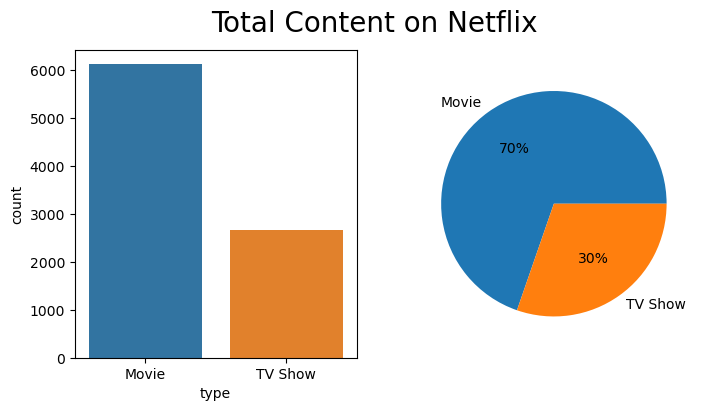

In [41]:
freq=df['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(df, x=df['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

Rating Distribution among the movies and TV Shows

In [42]:
df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [48]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='rating',
ascending=False)
ratings=ratings.rename(columns={'index':'rating','rating':'count'})

In [83]:
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


In [90]:
fig = px.bar(data_frame=ratings, 
             x = 'count', 
             y = 'rating', 
             color = 'rating',
             text = 'count',
             orientation= "h",
             title= "Popularity of Rating",
             labels = {
                    "x" : "Frequency",
                    "rating" : "Rating"
                },
             height=680
            )

# Custom Format of numbers
fig.update_traces(
    textposition = "outside",
    outsidetextfont = {
        "family": "consolas",
         "size": 13
    }
)

iplot(fig)

Text(0.5, 0.98, 'Rating on Netflix')

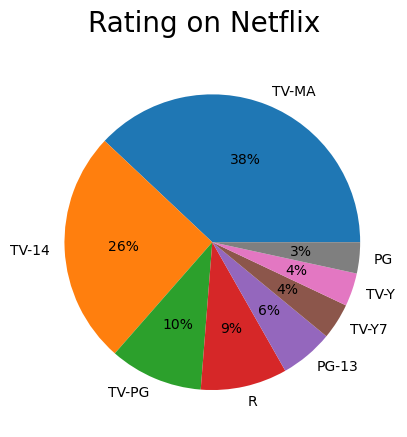

In [52]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

In [58]:
df['country'].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [68]:
num=df['country'].value_counts().reset_index().sort_values(by='country',ascending=False)
num=num.rename(columns={'index':'country','country':'count'})

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
...,...,...
71,Puerto Rico,1
70,Cyprus,1
69,Somalia,1
68,Paraguay,1


Top 10 countries with most content on Netflix

In [77]:
top_ten_countries=df['country'].value_counts().reset_index().sort_values(by='country', ascending=False)[:10]

top_ten_countries=top_ten_countries.rename(columns={'index':'country','country':'count'})
top_ten_countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


Text(0.5, 0.98, 'Top')

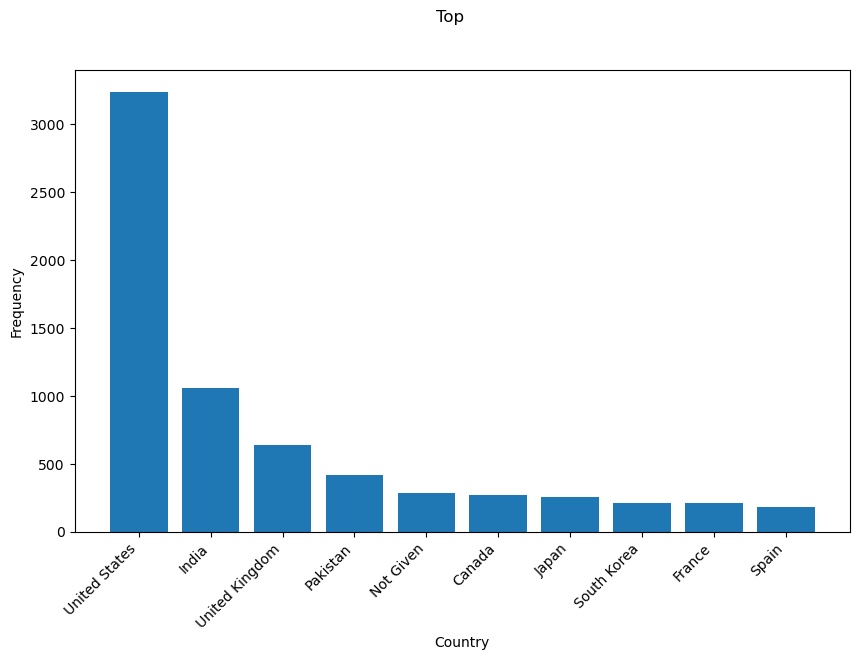

In [78]:
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top")

In [91]:
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day

Monthly releases of Movies and TV shows on Netflix

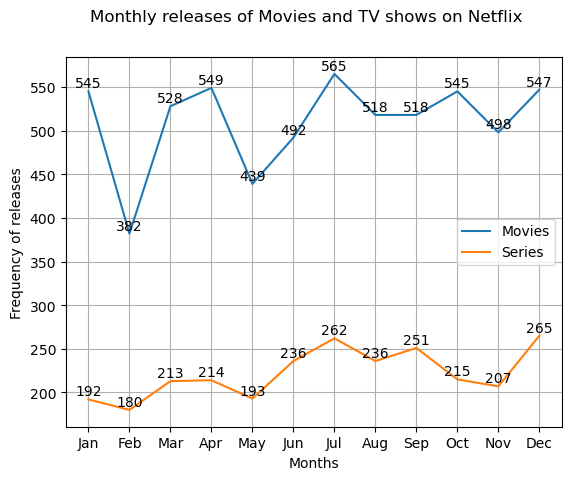

In [96]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')

for i in range(len(monthly_movie_release)):
    plt.text(monthly_movie_release.index[i], monthly_movie_release.values[i] + 1, 
             str(monthly_movie_release.values[i]), 
             ha='center', va='bottom', color='black')

plt.plot(monthly_series_release.index, monthly_series_release.values,label='Series')

for i in range(len(monthly_series_release)):
    plt.text(monthly_series_release.index[i], monthly_series_release.values[i] + 1, 
             str(monthly_series_release.values[i]), 
             ha='center', va='bottom', color='black')

plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

Yearly releases of Movies and TV Shows on Netflix

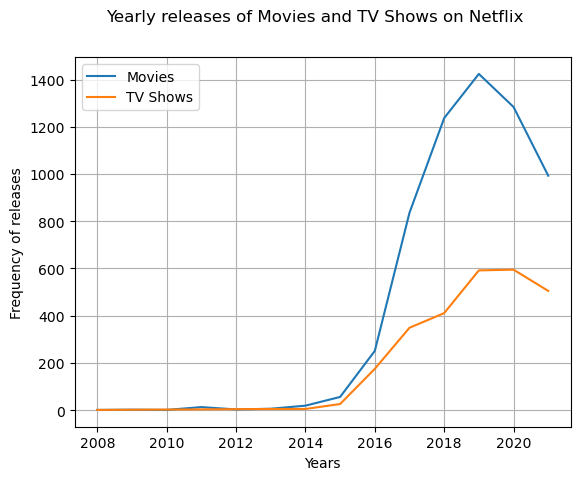

In [98]:
yearly_movie_releases=df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')

plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

In [104]:
movies = df.loc[df["type"] == "Movie", "rating"].value_counts()
tv_show = df.loc[df["type"] == "TV Show", "rating"].value_counts()
movies_bar = go.Bar(x = movies.index, y = movies, name="Movie")
tv_bar = go.Bar(x = tv_show.index, y = tv_show, name="Tv show")
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)
fig.add_trace(movies_bar, row=1, col=1)
fig.add_trace(tv_bar, row=1, col=2)
fig.update_layout(height=550, width=800, title_text="Count Of Movies/TV Show based on Rating")
fig.update_xaxes(tickangle=90)
iplot(fig)

Top 10 popular movie/tv shows genres

In [109]:
listed_in = df["listed_in"].str.split(", ")
listed_in.head()

0                                      [Documentaries]
1    [Crime TV Shows, International TV Shows, TV Ac...
2                 [TV Dramas, TV Horror, TV Mysteries]
3                 [Children & Family Movies, Comedies]
4    [Dramas, Independent Movies, International Mov...
Name: listed_in, dtype: object

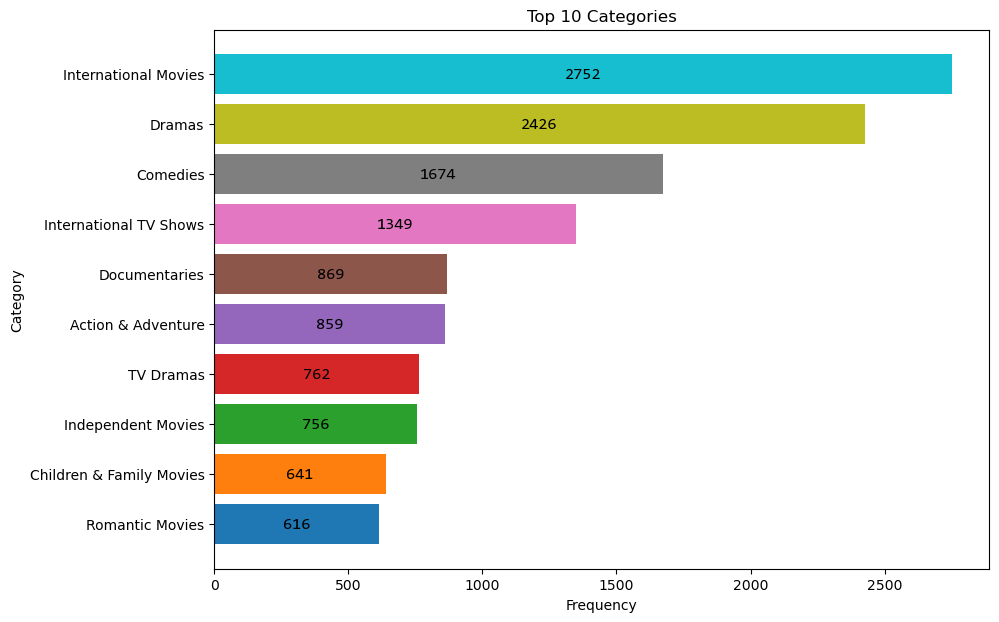

In [110]:
counter = Counter()
for i in listed_in:
    counter.update(i)
top_10_listed_in = counter.most_common(10)[::-1]
plt.figure(figsize=(10, 7))
for i in top_10_listed_in:
    fig = plt.barh(i[0], i[1])
    plt.bar_label( fig, label_type='center', size="12", family="consolas")  
    
plt.title("Top 10 Categories")    
plt.xlabel("Frequency")    
plt.ylabel("Category")    
plt.show()

Top 10 directors across Netflix with high frequency of movies and shows.

In [113]:
directors = df["director"].value_counts()[1:11]
directors

fig = px.bar(directors, 
       y =directors.index,
       x = directors,
       color=directors.index,
       text_auto=True,
       labels={"director": "Director", "x": "Number of Movies & TV Shows"},
       orientation= "h",
      )

fig.update_traces(
    textposition = "outside",
    outsidetextfont = {
        "family": "consolas",
         "size": 15,
    }
)
fig.update_layout(showlegend=False,height=550, width=800, title_text="Top 5 Directors")
iplot(fig)

Word Cloud of Movie Titles

In [118]:
!pip install wordcloud

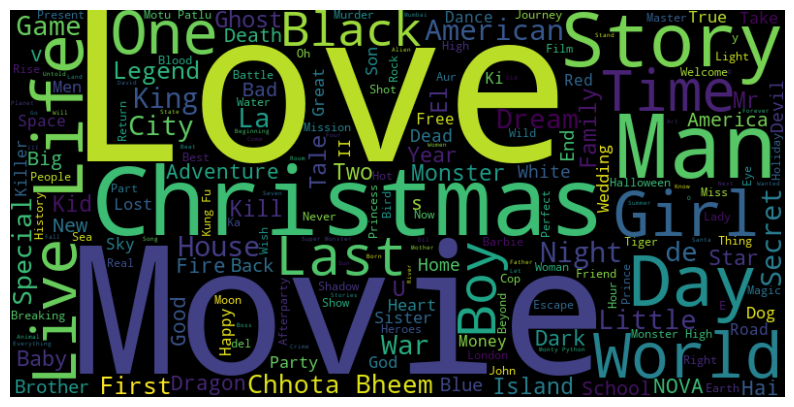

In [119]:

from wordcloud import WordCloud

# Generate word cloud
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400,
background_color='black').generate(' '.join(movie_titles))

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Feature Engineering

In [120]:
# Feature Engineering

# 1. Number of genres per movie/show
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(',')))

# 2. Extracting duration in minutes or counting seasons for TV shows
def extract_duration(value):
    if 'Season' in value:
        return int(value.split()[0])  # Extract number of seasons
    else:
        return int(value.split()[0])  # Extract number of minutes

df['duration_in_minutes'] = df['duration'].apply(extract_duration)

In [121]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,day,genre_count,duration_in_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25,1,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,3,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,3,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22,2,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24,3,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,1,17,2,2
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,9,13,1,3
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,12,15,3,1
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,6,23,1,1


Movie Recommendtion System

Top 10 recommendations for a movie or series

In [123]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Combining relevant features
df['combined_features'] = df['type'] + ' ' + df['listed_in'] + ' ' + df['country'] + ' ' + df['duration']

# Step 2: Convert text data to numerical form using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Step 3: Compute cosine similarity between items
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Recommendation function
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df[df['title'] == title].index[0]  
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Example: Get recommendations for 'Sankofa'
recommendations = get_recommendations('Sankofa')
print("Recommendations for 'Sankofa':")
print(recommendations)

Recommendations for 'Sankofa':
1876                   Penalty
3630        Tu Hai Mera Sunday
2989          Quién te cantará
5864         SGT. Will Gardner
6356       Thorne: Scaredy Cat
6357        Thorne: Sleepyhead
265                 Thimmarusu
6440    Viswasapoorvam Mansoor
4623                      Cake
1866                    Inkaar
Name: title, dtype: object
